In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly as py
import plotly.express as px
import seaborn as sns
from pca import pca
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from joblib import dump

In [2]:
#importing the csv file to create models.
music_df = pd.read_csv('data.csv',index_col=['name'])
#droping columns that will just muddy up the data
music_df = music_df.drop(columns=['artists', 'release_date', 'id'])
#taking a look at the final dataframe before applying kmeans and pca
music_df.head()

acousticness  danceability  \
name                                                                        
Singende Bataillone 1. Teil                           0.995         0.708   
Fantasiestücke, Op. 111: Più tosto lento              0.994         0.379   
Chapter 1.18 - Zamek kaniowski                        0.604         0.749   
Bebamos Juntos - Instrumental (Remasterizado)         0.995         0.781   
Polonaise-Fantaisie in A-Flat Major, Op. 61           0.990         0.210   

                                               duration_ms  energy  explicit  \
name                                                                           
Singende Bataillone 1. Teil                         158648  0.1950         0   
Fantasiestücke, Op. 111: Più tosto lento            282133  0.0135         0   
Chapter 1.18 - Zamek kaniowski                      104300  0.2200         0   
Bebamos Juntos - Instrumental (Remasterizado)       180760  0.1300         0   
Polonaise-Fantaisie in A-Flat Major, Op. 61         687733  0.2040         0   

                                               instrumentalness  key  \
name                                                                   
Singende Bataillone 1. Teil                               0.563   10   
Fantasiestücke, Op. 111: Più tosto lento                  0.901    8   
Chapter 1.18 - Zamek kaniowski                            0.000    5   
Bebamos Juntos - Instrumental (Remasterizado)             0.887    1   
Polonaise-Fantaisie in A-Flat Major, Op. 61               0.908   11   

                                               liveness  loudness  mode  \
name                                                                      
Singende Bataillone 1. Teil                      0.1510   -12.428     1   
Fantasiestücke, Op. 111: Più tosto lento         0.0763   -28.454     1   
Chapter 1.18 - Zamek kaniowski                   0.1190   -19.924     0   
Bebamos Juntos - Instrumental (Remasterizado)    0.1110   -14.734     0   
Polonaise-Fantaisie in A-Flat Major, Op. 61      0.0980   -16.829     1   

                                               popularity  speechiness  \
name                                                                     
Singende Bataillone 1. Teil                             0       0.0506   
Fantasiestücke, Op. 111: Più tosto lento                0       0.0462   
Chapter 1.18 - Zamek kaniowski                          0       0.9290   
Bebamos Juntos - Instrumental (Remasterizado)           0       0.0926   
Polonaise-Fantaisie in A-Flat Major, Op. 61             1       0.0424   

                                                 tempo  valence  year  
name                                                                   
Singende Bataillone 1. Teil                    118.469   0.7790  1928  
Fantasiestücke, Op. 111: Più tosto lento        83.972   0.0767  1928  
Chapter 1.18 - Zamek kaniowski                 107.177   0.8800  1928  
Bebamos Juntos - Instrumental (Remasterizado)  108.003   0.7200  1928  
Polonaise-Fantaisie in A-Flat Major, Op. 61     62.149   0.0693  1928

In [3]:
#scalling the information to find the best fit
scale = StandardScaler().fit_transform(music_df)
music_scale = pd.DataFrame(data=scale, columns=music_df.columns, index=music_df.index)
music_scale.head()

acousticness  danceability  \
name                                                                        
Singende Bataillone 1. Teil                        1.332319      0.968662   
Fantasiestücke, Op. 111: Più tosto lento           1.329664     -0.907636   
Chapter 1.18 - Zamek kaniowski                     0.294154      1.202486   
Bebamos Juntos - Instrumental (Remasterizado)      1.332319      1.384983   
Polonaise-Fantaisie in A-Flat Major, Op. 61        1.319044     -1.871449   

                                               duration_ms    energy  \
name                                                                   
Singende Bataillone 1. Teil                      -0.599713 -1.097999   
Fantasiestücke, Op. 111: Più tosto lento          0.418119 -1.776785   
Chapter 1.18 - Zamek kaniowski                   -1.047680 -1.004503   
Bebamos Juntos - Instrumental (Remasterizado)    -0.417454 -1.341091   
Polonaise-Fantaisie in A-Flat Major, Op. 61       3.761300 -1.064341   

                                               explicit  instrumentalness  \
name                                                                        
Singende Bataillone 1. Teil                    -0.30452          1.296562   
Fantasiestücke, Op. 111: Più tosto lento       -0.30452          2.389253   
Chapter 1.18 - Zamek kaniowski                 -0.30452         -0.523513   
Bebamos Juntos - Instrumental (Remasterizado)  -0.30452          2.343994   
Polonaise-Fantaisie in A-Flat Major, Op. 61    -0.30452          2.411883   

                                                    key  liveness  loudness  \
name                                                                          
Singende Bataillone 1. Teil                    1.365333 -0.314998 -0.186652   
Fantasiestücke, Op. 111: Più tosto lento       0.796383 -0.737519 -3.014729   
Chapter 1.18 - Zamek kaniowski                -0.057043 -0.495997 -1.509457   
Bebamos Juntos - Instrumental (Remasterizado) -1.194943 -0.541247 -0.593587   
Polonaise-Fantaisie in A-Flat Major, Op. 61    1.649808 -0.614778 -0.963288   

                                                   mode  popularity  \
name                                                                  
Singende Bataillone 1. Teil                    0.641344   -1.462135   
Fantasiestücke, Op. 111: Più tosto lento       0.641344   -1.462135   
Chapter 1.18 - Zamek kaniowski                -1.559227   -1.462135   
Bebamos Juntos - Instrumental (Remasterizado) -1.559227   -1.462135   
Polonaise-Fantaisie in A-Flat Major, Op. 61    0.641344   -1.415802   

                                               speechiness     tempo  \
name                                                                   
Singende Bataillone 1. Teil                      -0.289840  0.049500   
Fantasiestücke, Op. 111: Più tosto lento         -0.319186 -1.073199   
Chapter 1.18 - Zamek kaniowski                    5.568626 -0.317996   
Bebamos Juntos - Instrumental (Remasterizado)    -0.009722 -0.291114   
Polonaise-Fantaisie in A-Flat Major, Op. 61      -0.344530 -1.783425   

                                                valence      year  
name                                                               
Singende Bataillone 1. Teil                    0.940924 -1.923301  
Fantasiestücke, Op. 111: Più tosto lento      -1.735454 -1.923301  
Chapter 1.18 - Zamek kaniowski                 1.325822 -1.923301  
Bebamos Juntos - Instrumental (Remasterizado)  0.716082 -1.923301  
Polonaise-Fantaisie in A-Flat Major, Op. 61   -1.763655 -1.923301

In [4]:
# creating cluster defenition to call back when running kmeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(music_scale.values)
#find the centers of the Kmeans data
centers = kmeans.cluster_centers_
#prepare the lables of Kmeans for graphing
labels=kmeans.labels_
labels

array([0, 5, 1, ..., 4, 4, 4], dtype=int32)

In [5]:
def elbow_plot(df, num_clusters_test=10):
  """Create an elbow plot of KMeans Clustering data."""
  label_predictions = []
  for num in range(1, num_clusters_test+1):
    model = KMeans(num)
    model.fit(df)
    label_predictions.append(model.inertia_)
    print(num)
  plt.title('Cluster Variance')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Sum of Squared Distances')
  plt.plot(range(1, num_clusters_test+1), label_predictions, 'rx-')
  plt.show()

In [6]:
# elbow_plot(music_scale, 20)

### Kmeans 3d scater plots

In [7]:
music_scale.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence', 'year'],
      dtype='object')

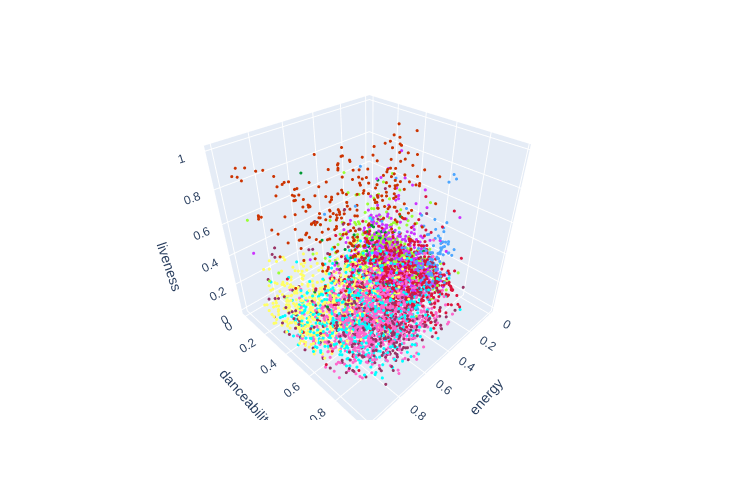

In [8]:
#adding lables to color code each group type
music_df['group']=labels.astype(str)
#sampling the dataset to make a more managable graph
music_sample = music_df.sample(5000, random_state=42)
#color dictionary
colors={'0':'crimson',
        '1':'#4da6ff',
        '2':'#ff66cc',
        '3':'#993366',
        '4':'#ffff66',
        '5':'#99ff33',
        '6':'#009933',
        '7':'#00ffff',
        '8':'#cc3300',
        '9':'#cc33ff'
       }
#graphing the Kmeans test
fig = px.scatter_3d(music_sample,
                    x='energy', # the first important feature
                    y='danceability', # the second important feature
                    z='liveness', # the third important feature
                    color='group', # calling the K-means group labels column for apllying color to the different data points
                    color_discrete_map=colors, # using the color dictionary previously created to apply colors 
                    width=700,
                    height=500,
                    hover_name=music_sample.index) # make each dot show teh name of the song when someone hovers over the dot
fig.update_traces(marker = dict(size=1), #changing the dot size to be something more reasonable and easier to see
                  showlegend=False) #removing the ledgend that is nodiscriptive and serves no puropse
fig.show()

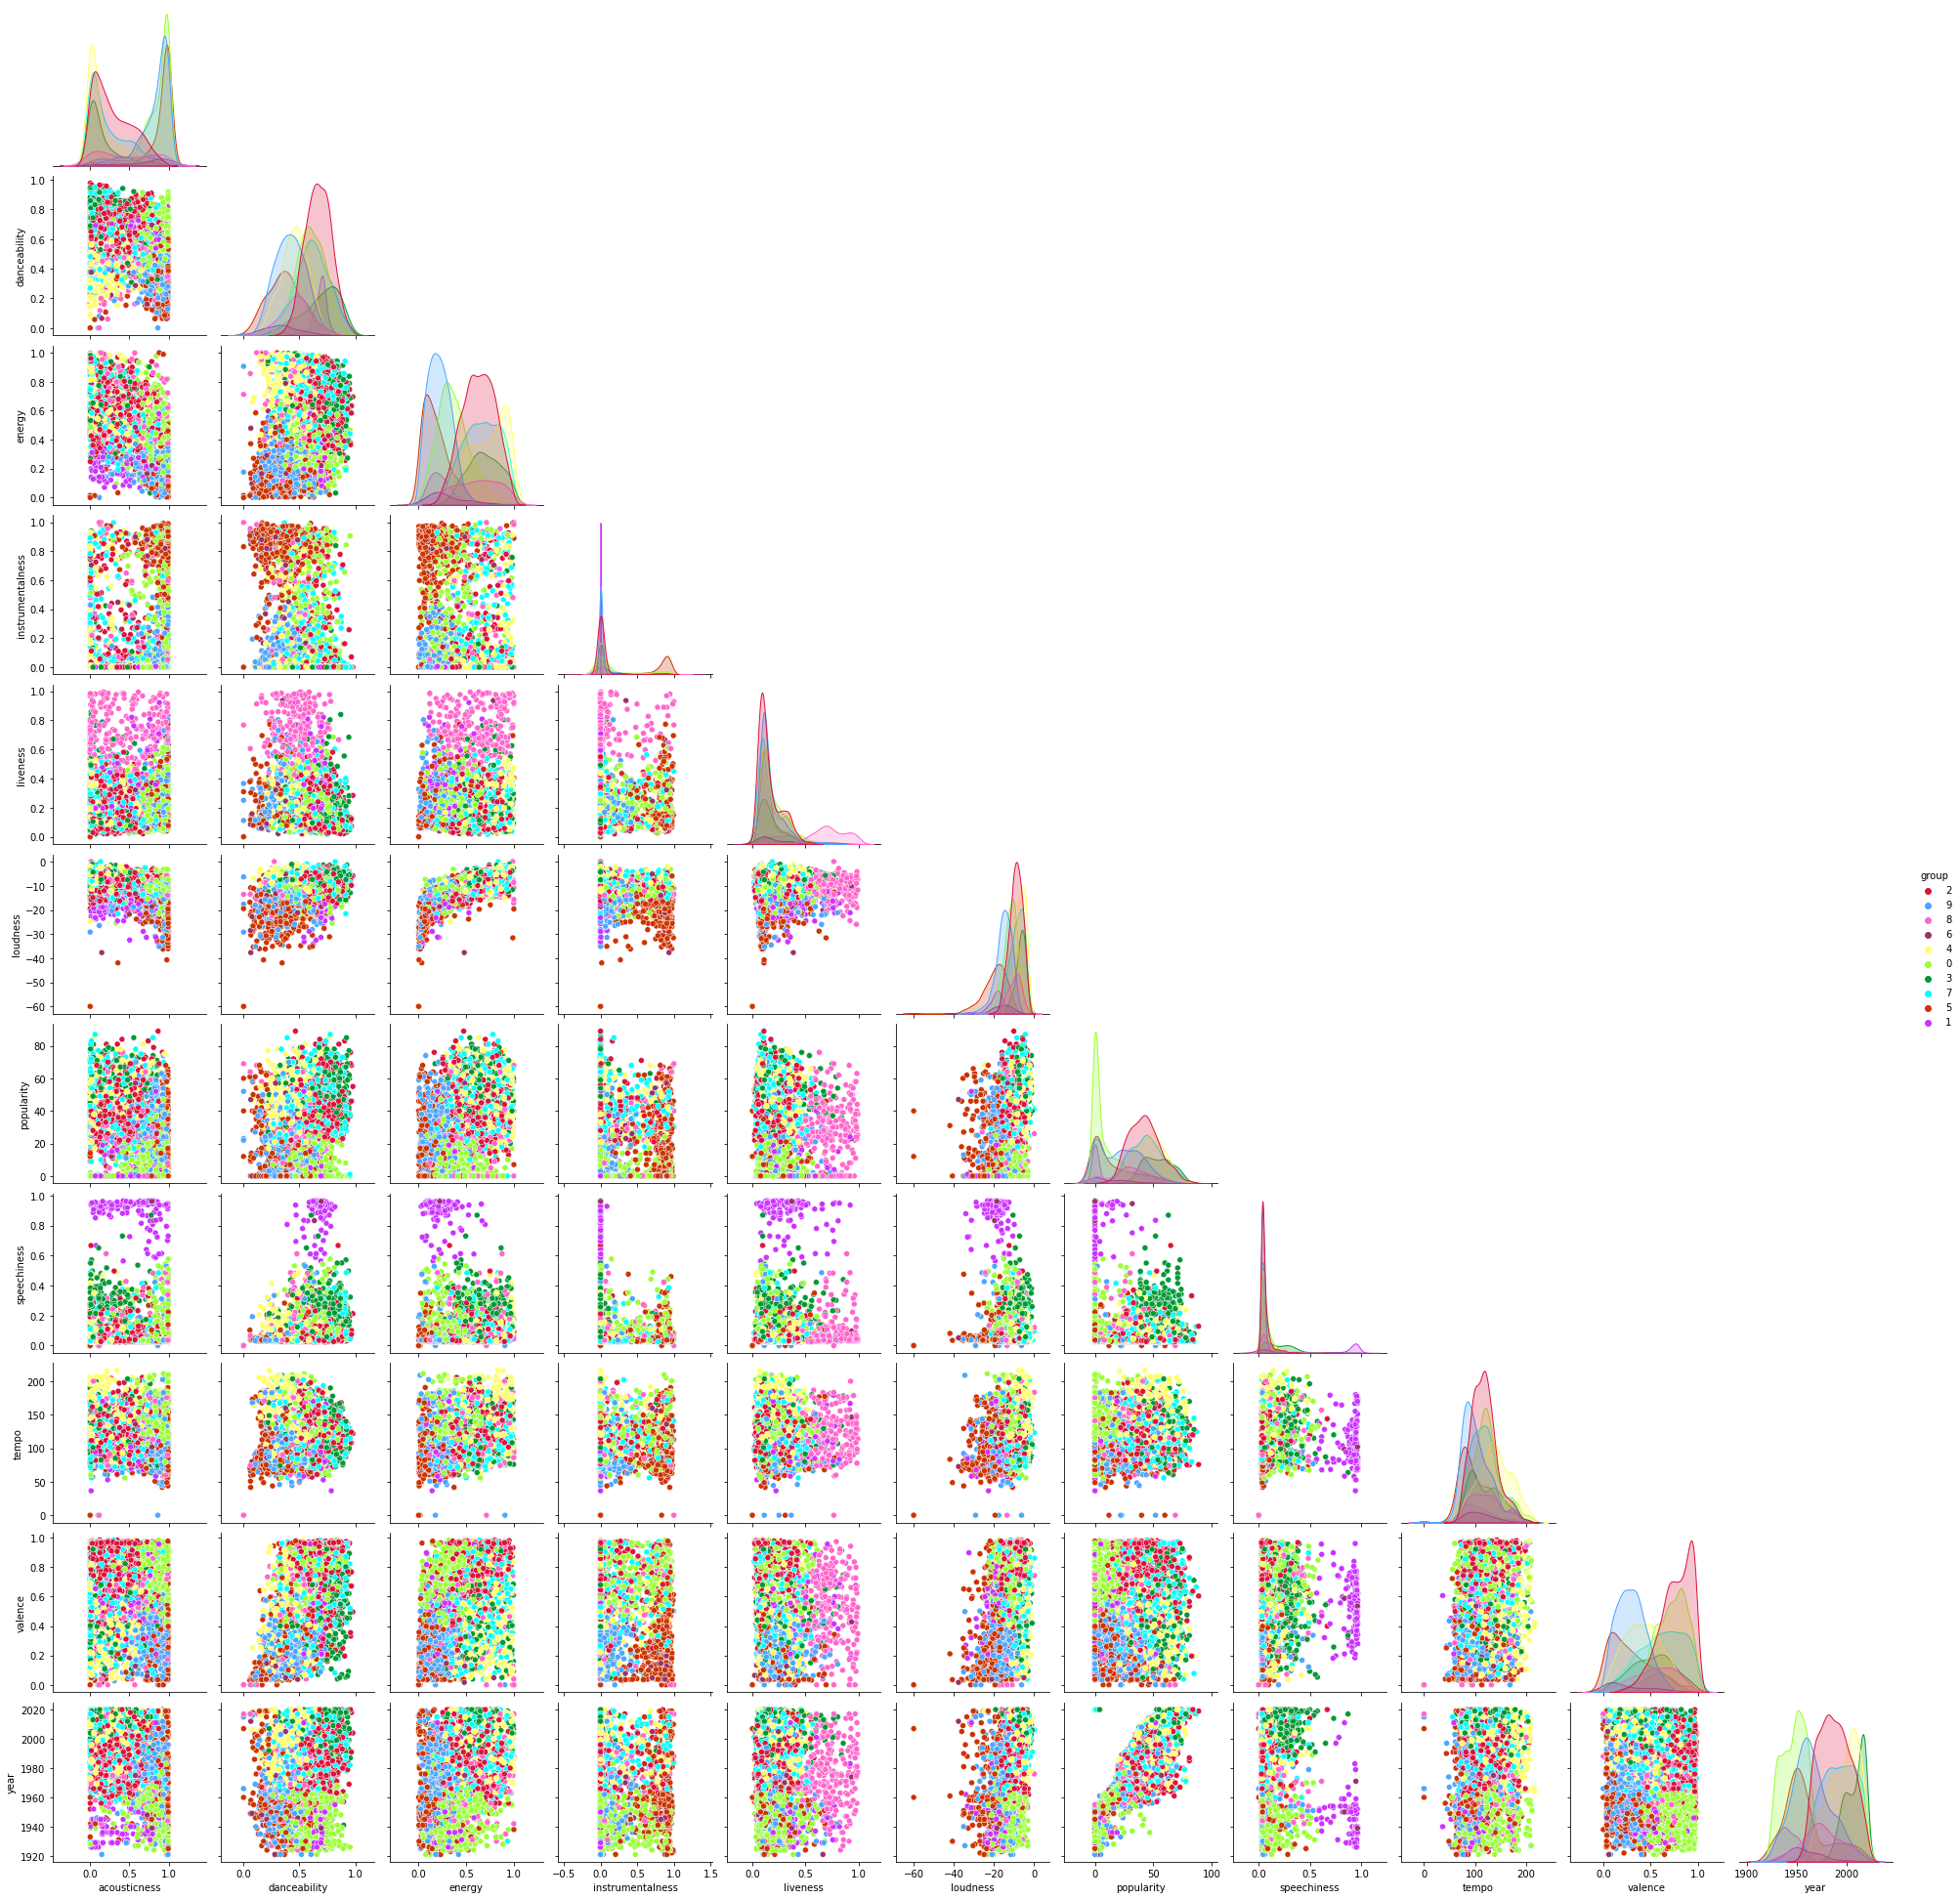

In [9]:
# Set a custom color palette to match with plotly graph
sncolors=('crimson',
          '#4da6ff',
          '#ff66cc',
          '#993366',
          '#ffff66',
          '#99ff33',
          '#009933',
          '#00ffff',
          '#cc3300',
          '#cc33ff')
customPalette = sns.set_palette(sns.color_palette(sncolors))

sns.pairplot(music_sample,
             hue='group',
             vars=(['acousticness',
                    'danceability',
                    'energy',
                    'instrumentalness',
                    'liveness',
                    'loudness',
                    'popularity',
                    'speechiness',
                    'tempo',
                    'valence',
                    'year']),
             palette=customPalette,
             corner=True)
plt.savefig('kmeans_pairplots.png')
plt.show()

### PCA analysis

In [10]:
def scree_plot(pca):
  num_length=len(pca.explained_variance_ratio_) #define how many components out
  ind = np.arange(num_length) #taging the spot of each value to assign the component to
  vals= pca.explained_variance_ratio_ #the total variance of the pca

  plt.figure(figsize=(18,6))
  ax = plt.subplot(111)
  cumval = np.cumsum(vals) #add up all the variance of the proceeding pcas till that point
  ax.bar(ind,vals)
  ax.plot(ind, cumval)
  for i in range(num_length):
    ax.annotate(r'%s' % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va='bottom',ha='center',fontsize=7)

  ax.xaxis.set_tick_params(width=0)
  ax.yaxis.set_tick_params(width=2, length=12)
  plt.xlim(0,10)
 
  ax.set_xlabel("Principal Component")
  ax.set_ylabel("Variance Explained (%)")
  plt.title('Explained Variance Per Principal Component')

In [11]:
mod1=PCA(.9)

In [12]:
pca_fit= mod1.fit_transform(music_scale)

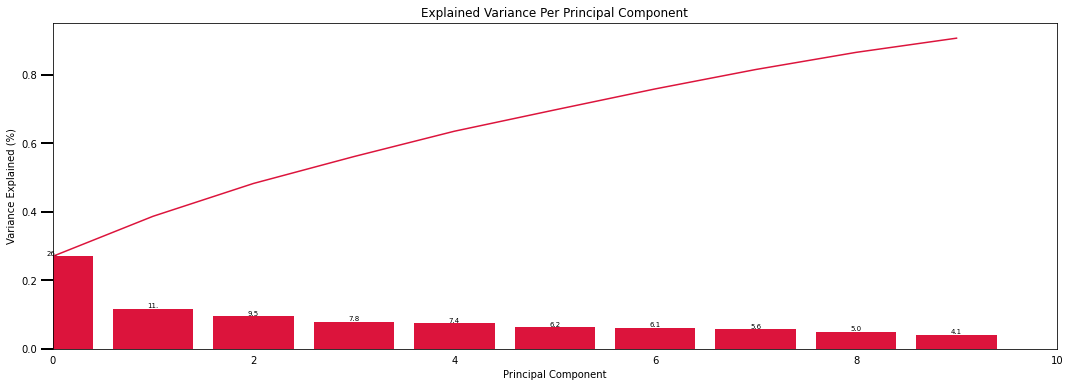

In [13]:
scree_plot(mod1)

### second pca method to determin most important features

In [14]:
mod2=pca(.9)

In [15]:
pca_fit2= mod2.fit_transform(music_scale)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [90.0%] explained variance using the [15] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [10] that covers the [90.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


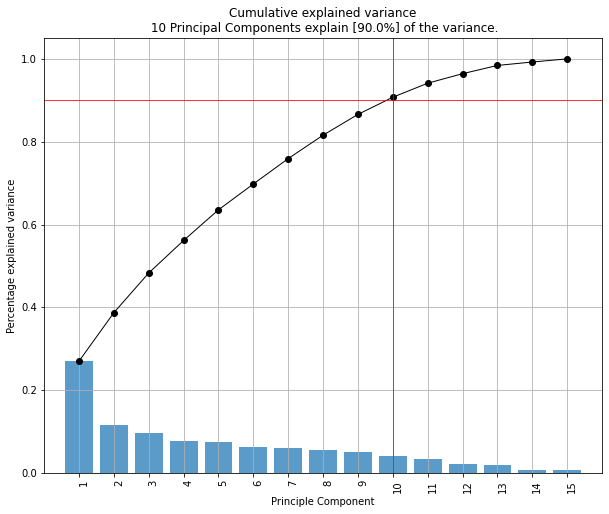

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 10 Principal Components explain [90.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [16]:
mod2.plot()

In [17]:
pca_fit2['topfeat']['feature'].to_list()

['energy',
 'danceability',
 'explicit',
 'liveness',
 'key',
 'tempo',
 'key',
 'duration_ms',
 'instrumentalness',
 'liveness',
 'explicit',
 'loudness',
 'valence',
 'energy',
 'year',
 'acousticness',
 'mode',
 'popularity',
 'speechiness']

In [18]:
scaleline = scale
pipeline = kmeans
dump(pipeline, 'pipeline.joblib', compress=True) 
dump(scaleline, 'scale.joblib', compress=True)

['scale.joblib']